<a href="https://colab.research.google.com/github/amartyacodes/MedicalReportGenerator/blob/main/Medical_Report_Generation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install --upgrade pip setuptools wheel
!python -m pip install lbry-libtorrent

!apt install python3-libtorrent



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.5 MB/s 
     |████████████████████████████████| 1.2 MB 33.8 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 30.7 MB/s eta 0:00:00
Reading package lists... Do

In [ ]:
# import os
# os.mkdir('/content/drive/MyDrive/FinalYearProject')

FileExistsError: ignored

## Downloading Torrents and Extracting

In [ ]:
downloads=[]

In [ ]:
# import libtorrent as lt
# from google.colab import files

# source = files.upload()
# params = {
#     "save_path": "/content/drive/MyDrive/FinalYearProject/",
#     "ti": lt.torrent_info(list(source.keys())[0]),
# }
# downloads.append(ses.add_torrent(params))

In [ ]:
import time
from IPython.display import display
import ipywidgets as widgets

state_str = [
    "queued",
    "checking",
    "downloading metadata",
    "downloading",
    "finished",
    "seeding",
    "allocating",
    "checking fastresume",
]

layout = widgets.Layout(width="auto")
style = {"description_width": "initial"}
download_bars = [
    widgets.FloatSlider(
        step=0.01, disabled=True, layout=layout, style=style
    )
    for _ in downloads
]
display(*download_bars)

while downloads:
    next_shift = 0
    for index, download in enumerate(downloads[:]):
        bar = download_bars[index + next_shift]
        if not download.is_seed():
            s = download.status()

            bar.description = " ".join(
                [
                    download.name(),
                    str(s.download_rate / 1000),
                    "kB/s",
                    state_str[s.state],
                ]
            )
            bar.value = s.progress * 100
        else:
            next_shift -= 1
            ses.remove_torrent(download)
            downloads.remove(download)
            bar.close() # Seems to be not working in Colab (see https://github.com/googlecolab/colabtools/issues/726#issue-486731758)
            download_bars.remove(bar)
            print(download.name(), "complete")
    time.sleep(1)


In [ ]:
os.mkdir('/content/drive/MyDrive/FinalYearProject/Images/')

In [ ]:
os.mkdir('/content/drive/MyDrive/FinalYearProject/Reports')

In [ ]:
!tar -xvf "/content/drive/MyDrive/FinalYearProject/NLMCXR_png.tgz" -C "/content/drive/MyDrive/FinalYearProject/Images/"     #[run this cell to extract tar files]

In [ ]:
!tar -xvf "/content/drive/MyDrive/FinalYearProject/NLMCXR_reports.tgz" -C "/content/drive/MyDrive/FinalYearProject/Reports"     #[run this cell to extract tar files]

## EDA

### Importing Necessary Libraries

In [ ]:

import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
from google.colab.patches import cv2_imshow
import re
from bs4 import BeautifulSoup #for reading xml file
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS  #for plotting wordcloud
from tqdm import tqdm

### Image Data Information

In [ ]:
image_folder = '/content/drive/MyDrive/FinalYearProject/Images' #path to folder containing images
total_images = len(os.listdir(image_folder))
print('The number of images in data are: %i'%(total_images))

The number of images in data are: 7471


1)



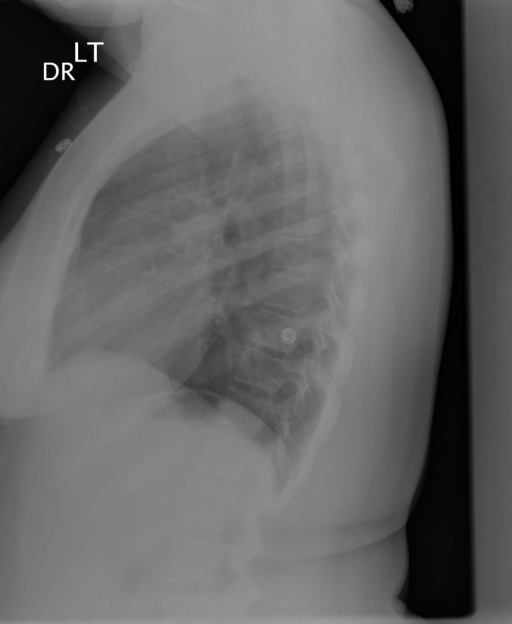

		 CXR1712_IM-0470-2001.png
2)



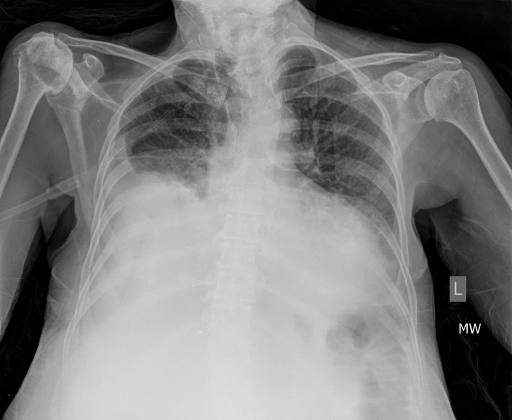

		 CXR1957_IM-0624-4004.png
3)



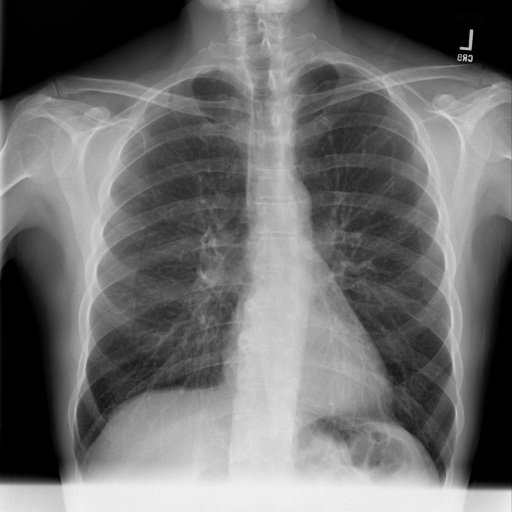

		 CXR3957_IM-2022-1001.png


In [ ]:
#showing random 3 sample images
np.random.seed(420)
for i in range(3): #print 5 sample images
  k = np.random.choice(range(total_images))
  image_file = os.listdir(image_folder)[k]
  image = cv2.imread(os.path.join(image_folder,image_file)) #getting an image file
  print("%i)\n"%(i+1))
  cv2_imshow(image)
  print("\t\t",image_file) #the image file name

### Report Information

In [ ]:

reports_folder = "/content/drive/MyDrive/FinalYearProject/Reports/ecgen-radiology"
total_reports = len(os.listdir(reports_folder))
print('The number of reports in the data are: %i'%(total_reports))

The number of reports in the data are: 3955


In [ ]:

no_images = [] #stores the no. of images
for file in os.listdir(reports_folder):
  report_file = os.path.join(reports_folder,file)
  with open(report_file, 'r') as f:  #reading the xml data
    data = f.read()
  regex = r"parentImage id.*" #getting all the image names
  k  = re.findall(regex,data)
  temp = len(k)
  no_images.append(temp)

In [ ]:

no_images = np.array(no_images)
print("The max no. of images found associated with a report: %i"%(no_images.max()))
print("The min no. of images found associated with a report: %i"%(no_images.min()))

The max no. of images found associated with a report: 5
The min no. of images found associated with a report: 0


### Number of Images Associated with a Single Report

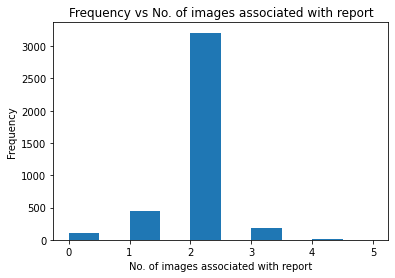

Image Value_counts

2    3208
1     446
3     181
0     104
4      15
5       1
dtype: int64


In [ ]:

plt.figure(figsize = (6,4))
ax = pd.Series(no_images).plot(kind='hist')
ax.set_xlabel('No. of images associated with report')
ax.set_title("Frequency vs No. of images associated with report")
plt.show()
print("Image Value_counts\n")
print(pd.Series(no_images).value_counts())

In [ ]:
# function for obtaining the different information part of the xml report file and preprocessing them and also adding the concernced image and report information to the dataframe
def decontracted(phrase): #https://stackoverflow.com/a/47091490
  """
  performs text decontraction of words like won't to will not
  """
  # specific
  phrase = re.sub(r"won\'t", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)

  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase


def get_info(xml_data,info): #https://regex101.com/
  """
  extracts the information data from the xml file and does text preprocessing on them
  here info can be 1 value in this list ["COMPARISON","INDICATION","FINDINGS","IMPRESSION"]
  """
  regex = r"\""  +info +r"\".*" 
  k = re.findall(regex,xml_data)[0] #finding info part of the report

  regex = r"\>.*\<"
  k = re.findall(regex,k)[0] #removing info string and /AbstractText>'

  regex = r"\d." 
  k = re.sub(regex,"",k) #removing all values like "1." and "2." etc

  regex = r"X+"
  k = re.sub(regex,"",k) #removing words like XXXX

  regex = r" \."
  k = re.sub(regex,"",k) #removing singular fullstop ie " ."

  regex = r"[^.a-zA-Z]" 
  k = re.sub(regex," ",k) #removing all special characters except for full stop

  regex = r"\."
  k = re.sub(regex," .",k) #adding space before fullstop
  k = decontracted(k) #perform decontraction
  k = k.strip().lower() #strips the begining and end of the string of spaces and converts all into lowercase
  k = " ".join(k.split()) #removes unwanted spaces
  if k=="": #if the resulting sentence is an empty string return null value
    k = np.nan
  return k

def get_final(data):
  """
  given an xml data returns "COMPARISON","INDICATION","FINDINGS","IMPRESSION" part of the data
  """
  try: #assigning null values to the ones that don't have the concerned info
      comparison = get_info(data, "COMPARISON")
  except:
    comparison = np.nan;

  try: #assigning null values to the ones that don't have the concerned info
    indication = get_info(data, "INDICATION")
  except:
    indication = np.nan;

  try: #assigning null values to the ones that don't have the concerned info
    finding = get_info(data,"FINDINGS")
  except:
    finding = np.nan;

  try: #assigning null values to the ones that don't have the concerned info
    impression = get_info(data, "IMPRESSION")
  except:
    impression = np.nan;

  return comparison,indication,finding,impression

def get_df():
  """
  Given an xml data, it will extract the two image names and corresponding info text and returns a dataframe
  """
  im1 = [] #there are 2 images associated with a report
  im2 = []
  #stores info
  comparisons = []
  indications = []
  findings = []
  impressions = [] 
  report = [] #stores xml file name
  for file in tqdm(os.listdir(reports_folder)):
    report_file = os.path.join(reports_folder,file)
    with open(report_file, 'r') as f:  #reading the xml data
      data = f.read()
  
    regex = r"parentImage id.*" #getting all the image names
    k  = re.findall(regex,data)

    if len(k)==2: 
      regex = r"\".*\"" #getting the name
      image1 = re.findall(regex,k[0])[0]
      image2 = re.findall(regex,k[1])[0]

      image1 = re.sub(r"\"","",image1)
      image2 = re.sub(r"\"","",image2)

      image1 = image1.strip()+".png"
      image2 = image2.strip()+".png"
      im1.append(image1)
      im2.append(image2)

      comparison,indication,finding,impression = get_final(data)
      comparisons.append(comparison)
      indications.append(indication)
      findings.append(finding)
      impressions.append(impression)
      report.append(file) #xml file name

    
    elif len(k)<2:
      regex = r"\".*\"" #getting the name
      try: #if the exception is raised means no image file name was found
        image1 = re.findall(regex,k[0])[0]
        image1 = re.sub(r"\"","",image1) #removing "
        image2 = np.nan

        image1 = image1.strip()+".png"
      except:
        image1 = np.nan
        image2 = np.nan


      im1.append(image1)
      im2.append(image2)
      comparison,indication,finding,impression = get_final(data)
      comparisons.append(comparison)
      indications.append(indication)
      findings.append(finding)
      impressions.append(impression)
      report.append(file) #xml file name
    
    else: #if there are more than 2 images concerned with report
      comparison,indication,finding,impression = get_final(data)

      for i in range(len(k)-1):
        regex = r"\".*\"" #getting the name
        image1 = re.findall(regex,k[i])[0] #re.findall returns a list
        image2 = re.findall(regex,k[i+1])[0] 

        image1 = re.sub(r"\"","",image1) #removing "
        image2 = re.sub(r"\"","",image2) #removing "

        image1 = image1.strip()+".png"
        image2 = image2.strip()+".png"

        im1.append(image1)
        im2.append(image2)
        comparisons.append(comparison)
        indications.append(indication)
        findings.append(finding)
        impressions.append(impression)
        report.append(file) #xml file name
    
  df = pd.DataFrame({"image_1":im1,"image_2":im2,"comparison":comparisons,"indication":indications,"findings":findings,"impression":impressions,"xml file name":report})
  return df


In [ ]:
%%time
df = get_df()

100%|██████████| 3955/3955 [00:06<00:00, 571.39it/s]

CPU times: user 1.87 s, sys: 703 ms, total: 2.57 s
Wall time: 7.02 s


In [ ]:
df.to_pickle("/content/drive/MyDrive/FinalYearProject/df.pkl")


In [ ]:
import pandas as pd
df = pd.read_pickle("/content/drive/MyDrive/FinalYearProject/df_final.pkl")
df.shape

(4033, 11)

In [ ]:
df.head(3)

,image_1,image_2,comparison,indication,findings,impression,xml file name,im1_height,im1_width,im2_height,im2_width
0,CXR3296_IM-1575-1001-0001.png,CXR3296_IM-1575-1001-0002.png,none .,NaN,the lungs are clear . heart size is normal . n...,clear lungs . no acute cardiopulmonary abnorma...,3296.xml,419,512,624,512
1,CXR1469_IM-0303-1001.png,CXR1469_IM-0303-2001.png,chest views .,kidney transplant,there is no focal airspace consolidation or pl...,no acute cardiopulmonary abnormality .,1469.xml,512,512,512,512
2,CXR3927_IM-2000-1001.png,CXR3927_IM-2000-2001.png,NaN,status post aortic stent,NaN,stable position of the aortic stent with a nor...,3927.xml,587,512,563,512


In [ ]:
df.head()


,image_1,image_2,comparison,indication,findings,impression,xml file name,im1_height,im1_width,im2_height,im2_width
0,CXR3296_IM-1575-1001-0001.png,CXR3296_IM-1575-1001-0002.png,none .,NaN,the lungs are clear . heart size is normal . n...,clear lungs . no acute cardiopulmonary abnorma...,3296.xml,419,512,624,512
1,CXR1469_IM-0303-1001.png,CXR1469_IM-0303-2001.png,chest views .,kidney transplant,there is no focal airspace consolidation or pl...,no acute cardiopulmonary abnormality .,1469.xml,512,512,512,512
2,CXR3927_IM-2000-1001.png,CXR3927_IM-2000-2001.png,NaN,status post aortic stent,NaN,stable position of the aortic stent with a nor...,3927.xml,587,512,563,512
3,CXR1489_IM-0315-1001.png,CXR1489_IM-0315-2001.png,radiograph chest pa and lateral,chest pain .,the heart is normal in size and contour . ther...,no acute cardiopulmonary abnormalities .,1489.xml,420,512,624,512
4,CXR3848_IM-1946-1001-0001.png,CXR3848_IM-1946-1001-0002.png,ap chest dated,year old with and shortness of breath .,the heart size is moderate to severely enlarge...,moderate to severe cardiomegaly with probable ...,3848.xml,419,512,512,512


In [ ]:

print("columns\t\t%missing values")
print('-'*30)
print(df.isnull().sum()*100/df.shape[0] )#percentage missing values

columns		%missing values
------------------------------
image_1           0.000000
image_2           0.000000
comparison       32.878750
indication        5.752542
findings         12.918423
impression        0.000000
xml file name     0.000000
im1_height        0.000000
im1_width         0.000000
im2_height        0.000000
im2_width         0.000000
dtype: float64


In [ ]:
df.drop(df[(df['impression'].isnull())|(df['image_1'].isnull())].index,inplace=True)
df = df.reset_index(drop=True).copy()
print("%i datapoints were removed.\nFinal no. of datapoints: %i"%(4169-df.shape[0],df.shape[0]))

136 datapoints were removed.
Final no. of datapoints: 4033


In [ ]:
%%time
df.loc[df.image_2.isnull(),'image_2'] = df[df.image_2.isnull()]['image_1'].values
im1_size = []
im2_size = []
for index,row in df.iterrows():
  im1_size.append( cv2.imread(os.path.join(image_folder,row.get('image_1'))).shape[:2])
  im2_size.append(cv2.imread(os.path.join(image_folder,row.get('image_2'))).shape[:2])

KeyboardInterrupt: ignored

In [ ]:

df['im1_height'] = [i[0] for i in im1_size]
df['im1_width'] = [i[1] for i in im1_size]
df['im2_height'] = [i[0] for i in im2_size]
df['im2_width'] = [i[1] for i in im2_size]

In [ ]:
df.head(2)


In [ ]:
df.to_pickle("/content/drive/MyDrive/FinalYearProject/df_final.pkl")


In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/FinalYearProject/df_final.pkl")
df.shape


(4033, 11)

In [ ]:
df.head()

,image_1,image_2,comparison,indication,findings,impression,xml file name,im1_height,im1_width,im2_height,im2_width
0,CXR3296_IM-1575-1001-0001.png,CXR3296_IM-1575-1001-0002.png,none .,NaN,the lungs are clear . heart size is normal . n...,clear lungs . no acute cardiopulmonary abnorma...,3296.xml,419,512,624,512
1,CXR1469_IM-0303-1001.png,CXR1469_IM-0303-2001.png,chest views .,kidney transplant,there is no focal airspace consolidation or pl...,no acute cardiopulmonary abnormality .,1469.xml,512,512,512,512
2,CXR3927_IM-2000-1001.png,CXR3927_IM-2000-2001.png,NaN,status post aortic stent,NaN,stable position of the aortic stent with a nor...,3927.xml,587,512,563,512
3,CXR1489_IM-0315-1001.png,CXR1489_IM-0315-2001.png,radiograph chest pa and lateral,chest pain .,the heart is normal in size and contour . ther...,no acute cardiopulmonary abnormalities .,1489.xml,420,512,624,512
4,CXR3848_IM-1946-1001-0001.png,CXR3848_IM-1946-1001-0002.png,ap chest dated,year old with and shortness of breath .,the heart size is moderate to severely enlarge...,moderate to severe cardiomegaly with probable ...,3848.xml,419,512,512,512


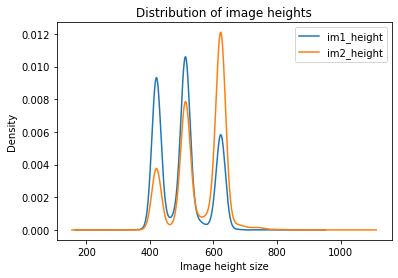



Value Counts of image_1 heights:

420    1130
512     926
624     674
511     234
618      87
Name: im1_height, dtype: int64

 ************************************************** 

Value Counts of image_2 heights:

624    1455
512     714
420     453
511     218
618      89
Name: im2_height, dtype: int64


In [ ]:
ax = df[['im1_height','im2_height']].plot(kind='kde')
ax.set_title("Distribution of image heights")
ax.set_xlabel("Image height size")
plt.show()

print("\n\nValue Counts of image_1 heights:\n")
print(df.im1_height.value_counts()[:5])
print("\n","*"*50,"\n")
print("Value Counts of image_2 heights:\n")
print(df.im2_height.value_counts()[:5])

In [ ]:
print("Value Counts of image_1 widths:\n")
print(df.im1_width.value_counts()[:5])
print("\n","*"*50,"\n")
print("Value Counts of image_2 widths:\n")
print(df.im2_width.value_counts()[:5])

Value Counts of image_1 widths:

512    4033
Name: im1_width, dtype: int64

 ************************************************** 

Value Counts of image_2 widths:

512    4033
Name: im2_width, dtype: int64


## Sample Image + Caption

In [ ]:

def show_image_captions(df = df,image_folder = image_folder,sample = 3):
  """
  given the df, samples datapoints and prints the images and caption
  df: dataframe
  image_folder: folder which contains images
  """
  k = df.sample(sample)
  i=1
  for index,row in k.iterrows():
    image_1 = cv2.imread(os.path.join(image_folder,row.get('image_1')))
    image_2 = cv2.imread(os.path.join(image_folder,row.get('image_2')))

    plt.figure(figsize = (12,8)) #setting the figure size
    plt.subplot(121) #first x-ray
    plt.imshow(image_1,aspect='auto')

    plt.subplot(122) #2nd x-ray
    plt.imshow(image_2, aspect = 'auto')
    print("%i)\n"%(i))
    i+=1
    plt.show() #printing the image
    print("\n","Comparison: ",row.get('comparison'))
    print("\n","Indication: ",row.get('indication'))
    print("\n","Findings: ",row.get('findings'))
    print("\n","Impression: ",row.get('impression'),"\n\n","*"*150,"\n\n")

1)



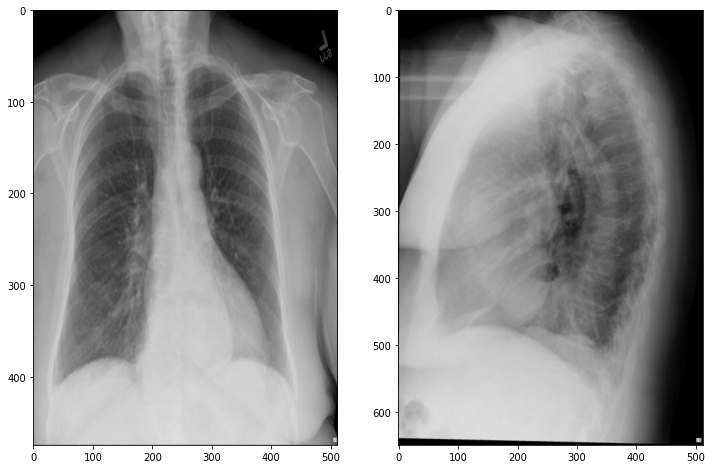


 Comparison:  nan

 Indication:  coarse wheeze and productive x hx chf .

 Findings:  both lungs remain clear and expanded . heart and pulmonary are normal . no change in the large hiatus hernia .

 Impression:  no change . no visible active cardiopulmonary disease . 

 ****************************************************************************************************************************************************** 


2)



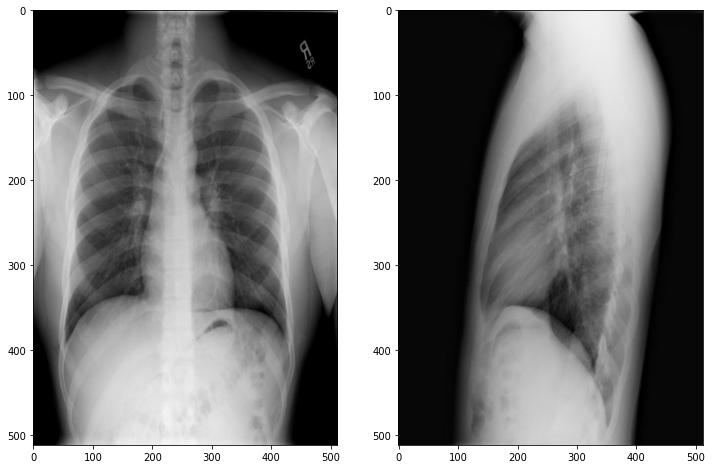


 Comparison:  none .

 Indication:  chest pain .

 Findings:  the cardiomediastinal silhouette and pulmonary vasculature are within normal limits in size . the lungs are clear of focal airspace disease pneumothorax or pleural effusion . there are no acute bony findings .

 Impression:  no acute cardiopulmonary findings . 

 ****************************************************************************************************************************************************** 


3)



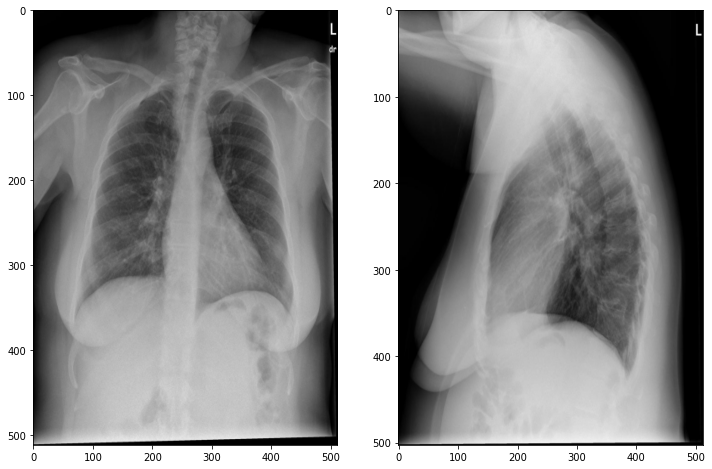


 Comparison:  chest radiograph .

 Indication:  year old female with shortness of breath .

 Findings:  clear lungs bilaterally . normal cardiac contours . no pneumothorax or pleural effusion .

 Impression:  no acute cardiopulmonary abnormality . 

 ****************************************************************************************************************************************************** 




In [ ]:
show_image_captions()


## WordCloud of Impressions

In [ ]:
df.shape

(4033, 11)

In [ ]:
#getting wordclouds
#https://www.geeksforgeeks.org/generating-word-cloud-python/
temp = df.loc[:,'impression'].str.replace(".","").copy() #removing all fullstops and storing the result in a temp variable
words = ""
for i in temp.values:
  k = i.split()
  words+= " ".join(k) + " "
word = words.strip()
wc = WordCloud(width = 1024, height = 720, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 15,).generate(words) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import random
word = np.array(word)

k =[]
for i in range(0,df.shape[0]):
  c = []
  for j in range(0,112):
    
    c.append(random.randint(0,1))

  k.append(c)

    


'clear lungs no acute cardiopulmonary abnormality no acute cardiopulmonary abnormality stable position of the aortic stent with a normal cardiac silhouette and clear lungs no acute cardiopulmonary abnormalities moderate to severe cardiomegaly with probable pulmonary artery hypertension persistent left basilar opacity without significant effusion no acute process cardiomegaly however no acute cardiopulmonary findings stable postop changes with mild cardiomegaly small bilateral pleural effusions no acute pulmonary abnormalities no acute pulmonary abnormality no acute cardiopulmonary abnormality no acute right pulmonary findings redemonstration of diffuse bilateral pulmonary fibrosis with relative sparing of the bilateral lung apices no focal pulmonary consolidation emphysematous changes without acute cardiopulmonary disease no acute cardiopulmonary abnormality left lower lobe nodule the differential diagnosis includes round pneumonia and parenchymal mass ct may be of further no evidence 

In [ ]:
np.unique(word)

array(['clear lungs no acute cardiopulmonary abnormality no acute cardiopulmonary abnormality stable position of the aortic stent with a normal cardiac silhouette and clear lungs no acute cardiopulmonary abnormalities moderate to severe cardiomegaly with probable pulmonary artery hypertension persistent left basilar opacity without significant effusion no acute process cardiomegaly however no acute cardiopulmonary findings stable postop changes with mild cardiomegaly small bilateral pleural effusions no acute pulmonary abnormalities no acute pulmonary abnormality no acute cardiopulmonary abnormality no acute right pulmonary findings redemonstration of diffuse bilateral pulmonary fibrosis with relative sparing of the bilateral lung apices no focal pulmonary consolidation emphysematous changes without acute cardiopulmonary disease no acute cardiopulmonary abnormality left lower lobe nodule the differential diagnosis includes round pneumonia and parenchymal mass ct may be of further no ev

In [ ]:
column_names = np.unique(word)[0]

In [ ]:
column_names = column_names.split(' ')

In [ ]:
column_names

In [ ]:
j =[]
d = 0
for i in column_names:
  j.append(i)
  d+=1
  if d>=112:
    break

In [ ]:
j[0]

'clear'

In [ ]:
len(k)

4033

In [ ]:
k[0]

In [ ]:
j

In [ ]:
res = {}
for key in j:
    for value in k:
        res[str(key)] = value
        k.remove(value)
        break 

In [ ]:
res

In [ ]:
df_new = pd.DataFrame(res)

In [ ]:
df_old = df.head(112)


In [ ]:
new_data = pd.concat([df_old,df_new],axis=1)
new_data.head()

,image_1,image_2,comparison,indication,findings,impression,xml file name,im1_height,im1_width,im2_height,...,sparing,lung,apices,focal,consolidation,emphysematous,disease,lower,lobe,nodule
0,CXR3296_IM-1575-1001-0001.png,CXR3296_IM-1575-1001-0002.png,none .,NaN,the lungs are clear . heart size is normal . n...,clear lungs . no acute cardiopulmonary abnorma...,3296.xml,419,512,624,...,0,1,0,1,0,1,0,1,0,1
1,CXR1469_IM-0303-1001.png,CXR1469_IM-0303-2001.png,chest views .,kidney transplant,there is no focal airspace consolidation or pl...,no acute cardiopulmonary abnormality .,1469.xml,512,512,512,...,0,0,1,0,1,1,0,0,1,1
2,CXR3927_IM-2000-1001.png,CXR3927_IM-2000-2001.png,NaN,status post aortic stent,NaN,stable position of the aortic stent with a nor...,3927.xml,587,512,563,...,1,1,1,0,0,0,1,0,1,0
3,CXR1489_IM-0315-1001.png,CXR1489_IM-0315-2001.png,radiograph chest pa and lateral,chest pain .,the heart is normal in size and contour . ther...,no acute cardiopulmonary abnormalities .,1489.xml,420,512,624,...,1,1,0,0,1,1,0,1,0,1
4,CXR3848_IM-1946-1001-0001.png,CXR3848_IM-1946-1001-0002.png,ap chest dated,year old with and shortness of breath .,the heart size is moderate to severely enlarge...,moderate to severe cardiomegaly with probable ...,3848.xml,419,512,512,...,0,1,1,1,1,0,0,0,1,1


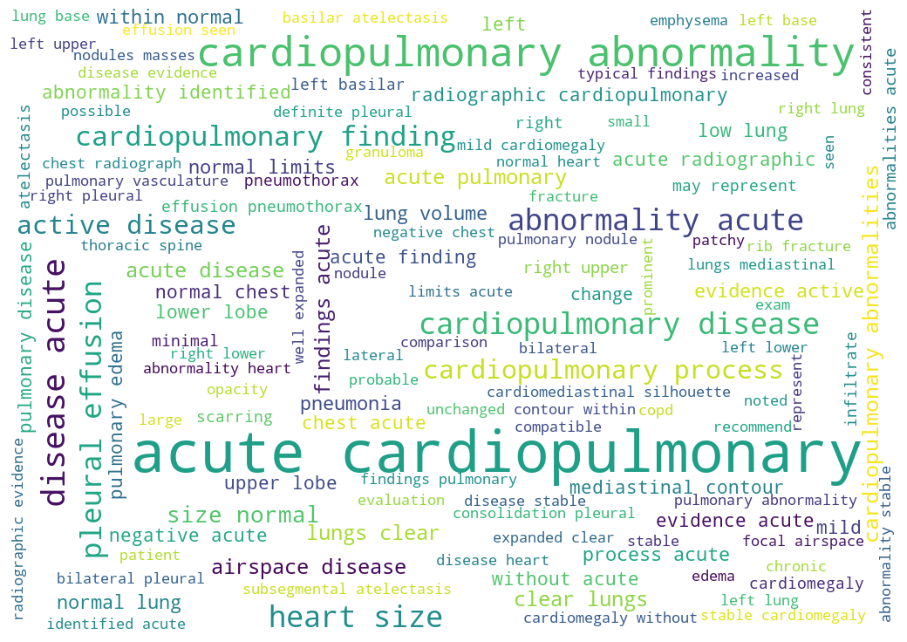

In [ ]:
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.axis("off")
plt.show()
